In [1]:
import numpy as np
from os import listdir
import seaborn as sns
from numpy.linalg import norm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
%matplotlib inline

In [2]:
def plot_figures(base_path):
    cosine = lambda x, y: np.dot(x, y)/(norm(x) * norm(y))
    langs, lang_states, langs_enum, sent_states = [], [], [], None

    for i, lang_pair in enumerate(sorted(listdir(base_path))):
        langs.append(lang_pair.split('-')[1])
        with open(f"{base_path}/{lang_pair}/encoder_states.npy", "rb") as f_in:
            e_states = np.load(f_in)
            langs_enum.extend([i]*len(e_states))
            lang_states.append(e_states.mean(0))
            sent_states = e_states if sent_states is None else np.concatenate((sent_states, e_states))

    sim_mat = np.array([[cosine(u, v) for v in lang_states] for u in lang_states])
    print(f"Mean: {sim_mat.mean()}\nVar: {sim_mat.var()}")


    # plotting
    title = base_path.split('/')[-1]
    sent_states = TSNE(n_jobs=-1).fit_transform(sent_states)

    plt.figure(figsize=(10,10))
    plt.scatter(
        sent_states[:, 0], 
        sent_states[:, 1],
        c=langs_enum,
        cmap=plt.get_cmap('RdBu', max(langs_enum)-min(langs_enum)+1)
    )
    plt.title(f"encoder_states in 2D: {title}")
    cb = plt.colorbar()
    cb.set_ticks(np.arange(0, max(langs_enum), max(langs_enum)/len(langs)))
    cb.set_ticklabels(langs)
    plt.show()

    plt.figure(figsize=(10,10))
    fig = sns.heatmap(
        sim_mat, 
        annot=True, 
        linewidths=1.5, 
        linecolor='k', 
        cmap="RdBu", 
        xticklabels=langs, 
        yticklabels=langs
    ).set(title=f'lang sim: {title}')
    plt.show()

Mean: 0.916015625
Var: 0.0015411376953125


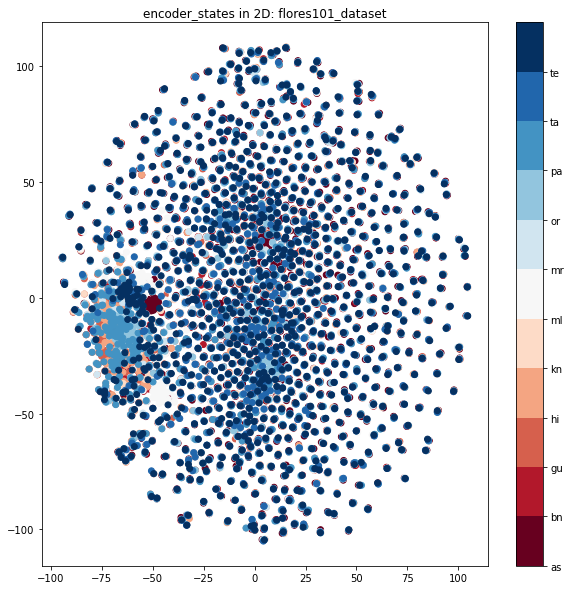

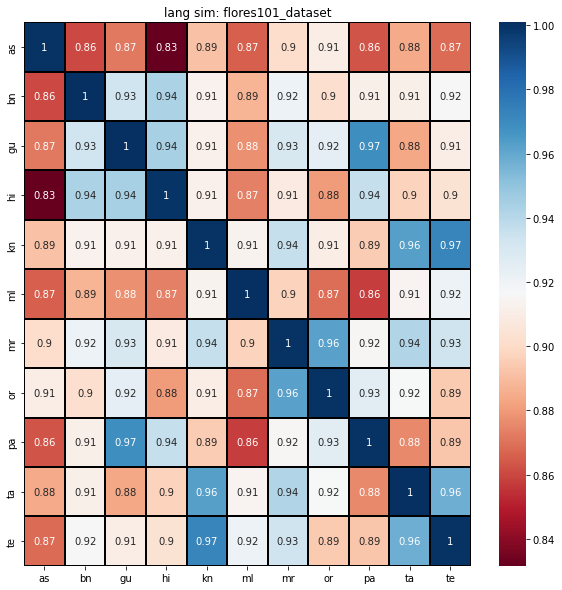

In [3]:
plot_figures("../benchmarks/flores101_dataset")

Mean: 0.94677734375
Var: 0.0009174346923828125


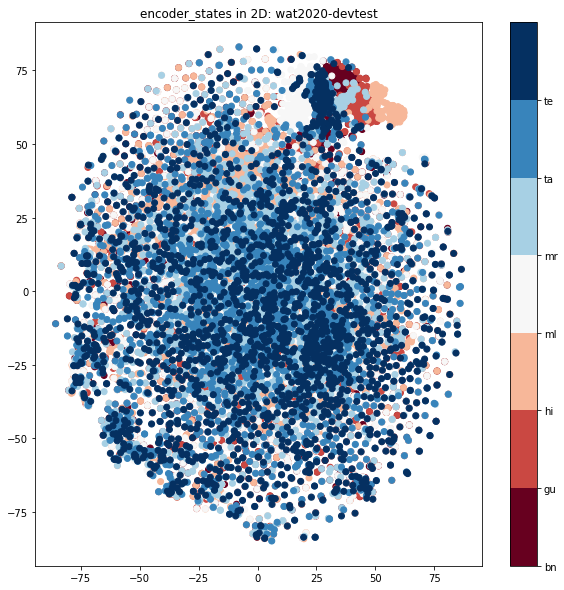

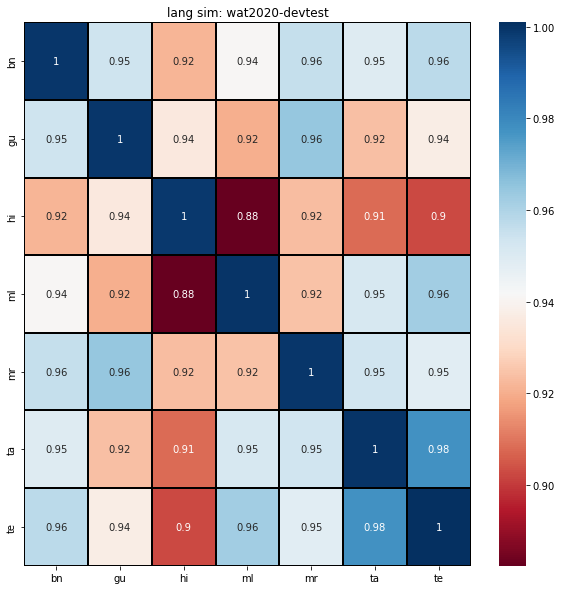

In [4]:
plot_figures("../benchmarks/wat2020-devtest")

Mean: 0.9296875
Var: 0.0014162063598632812


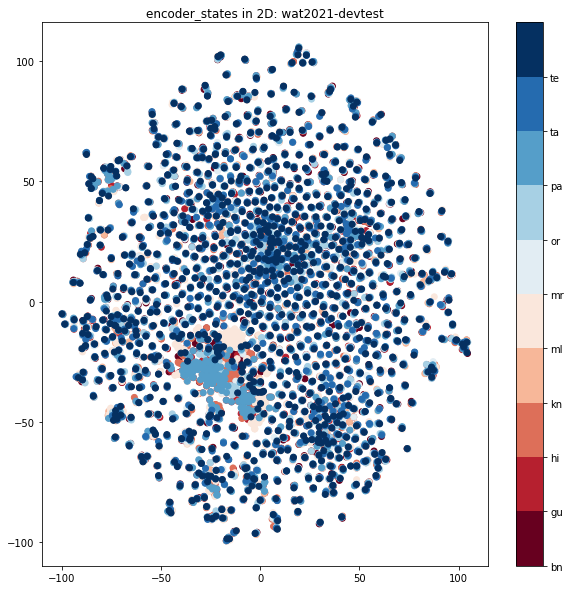

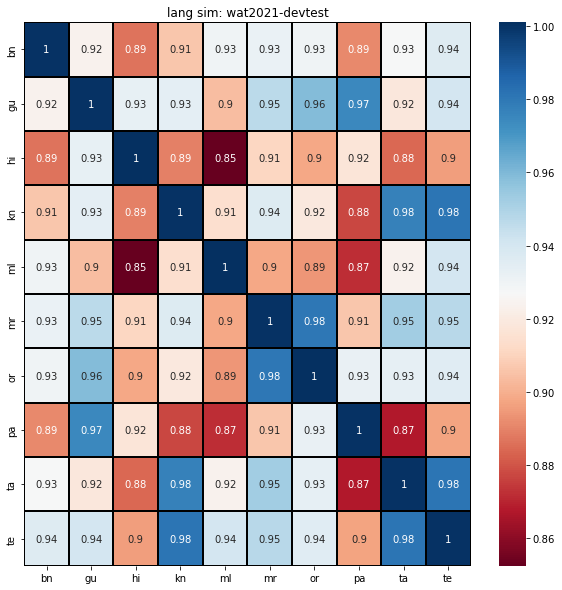

In [5]:
plot_figures("../benchmarks/wat2021-devtest")